Let's start by importing all the libraries we will use.

In [1]:
import numpy as np
from sklearn import manifold
from matplotlib import pyplot as plt
%matplotlib inline
import lapjv

Now we create 1024 3d points. 

In [2]:
side = 32
totalDataPoints = side * side
data3d = np.random.uniform(low=0.0, high=1.0, size=(totalDataPoints, 3))

And use t-SNE to create a 2d embedding.

In [3]:
from MulticoreTSNE import MulticoreTSNE as TSNE 
tsne = TSNE(n_components=2)
%time data2d = tsne.fit_transform(np.copy(data3d))

CPU times: user 2.33 s, sys: 0 ns, total: 2.33 s
Wall time: 2.37 s


The output of t-SNE is not normalized, so we do that now. This isn't strictly necessary, but makes it easier to visualize the results of the assignment solution.

In [4]:
data2d -= data2d.min(axis=0)
data2d /= data2d.max(axis=0)

Let's plot the data using the 3d points as colors and 2d points for position.

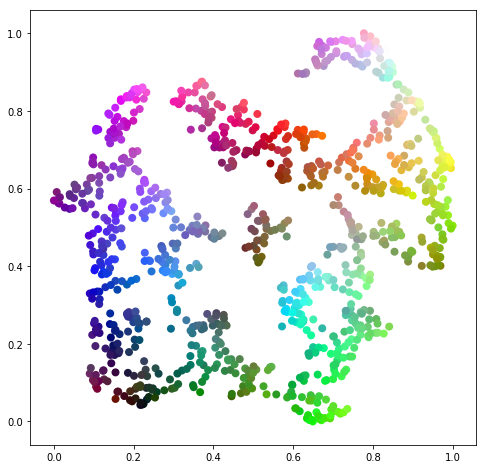

In [5]:
plt.figure(figsize=(8, 8))
plt.scatter(data2d[:,0], data2d[:,1], c=data3d, edgecolors='none', marker='o', s=64)  
plt.show()

Now let's make a list of grid points that we want to map our data onto.

In [6]:
xv, yv = np.meshgrid(np.linspace(0, 1, side), np.linspace(0, 1, side))
grid = np.dstack((xv, yv)).reshape(-1, 2)

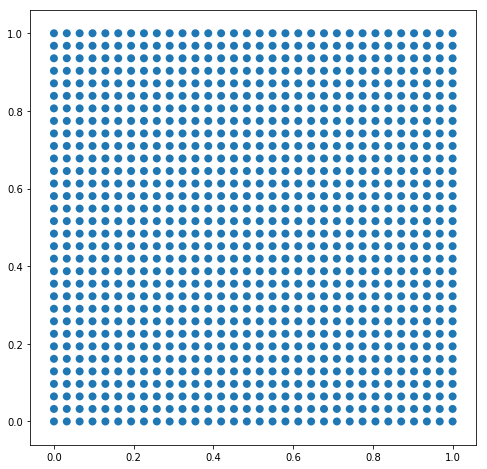

In [7]:
plt.figure(figsize=(8,8))
plt.scatter(grid[:,0], grid[:,1], edgecolors='none', marker='o', s=64)
plt.show()

Now we have two sets of 2d points.

In [8]:
print grid.shape
print data2d.shape

(1024, 2)
(1024, 2)


We evaluate a cost function that defines $n^2$ distances between the points. I like the results from the squared euclidean distance best.

CPU times: user 10 ms, sys: 10 ms, total: 20 ms
Wall time: 4.45 ms


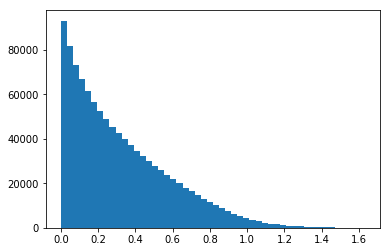

In [9]:
from scipy.spatial.distance import cdist
%time cost = cdist(grid, data2d, 'sqeuclidean')
plt.hist(cost.flatten(), bins=50)
plt.show()

Let's run the assignment problem solver.

Help on package lapjv:

NAME
    lapjv

FILE
    /usr/local/lib/python2.7/dist-packages/lapjv/__init__.py

DESCRIPTION
    Python wrapper of LAPJV
    ``python-lapjv`` is a wrapper around a linear assignment problem solver by
    Jonker and Volgenant.
    
    Functions
    ---------
    
    lap
        Find optimal (minimum-cost) assignment.

PACKAGE CONTENTS
    _lapjv
    tests (package)

FUNCTIONS
    lapjv(...)
        Solve linear assignment problem using Jonker-Volgenant algorithm.
        
        cost: (square) matrix containing the assignment costs
        extend_cost: whether or not extend a non-square matrix [default: False]
        cost_limit: an upper limit for a cost of a single assignment
                    [default: np.inf]
        
        Returns (lapcost, rowsol, colsol) where:
          lapcost: cost of the assignment
          rowsol:  vector of columns assigned to rows
          colsol:  vector of rows assigned to columns
        
        When extend_cost and/o

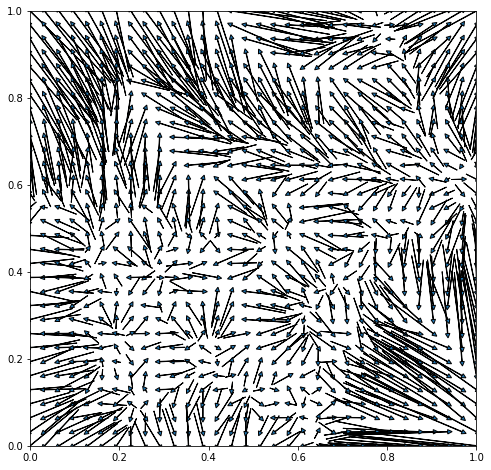

In [10]:
help('lapjv')
from lapjv import lapjv
%time min_cost, row_assigns, col_assigns = lapjv(cost, cost_limit=cost.max())
grid_jv = grid[col_assigns[:totalDataPoints]]
plt.figure(figsize=(8, 8))
for start, end in zip(data2d, grid_jv):
    plt.arrow(start[0], start[1], end[0] - start[0], end[1] - start[1],
              head_length=0.01, head_width=0.01)
plt.show()

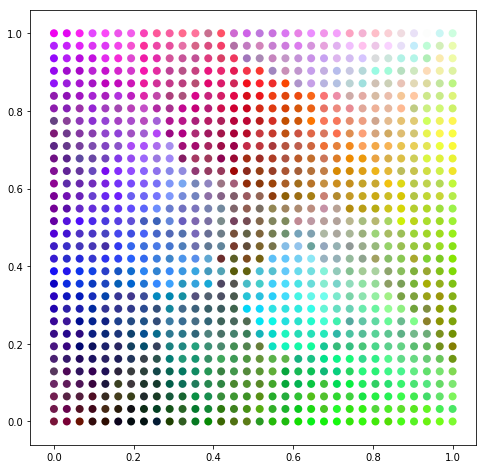

In [11]:
plt.figure(figsize=(8, 8))
plt.scatter(grid_jv[:,0], grid_jv[:,1], c=data3d, edgecolors='none', marker='o', s=64)  
plt.show()